# Лабораторная работа №2
## Выполнил студент группы БФИ1902 Копытько Сергей Максимович 
### Задание №1

Реализовать методы поиска в соответствии с заданием. Организовать генерацию начального набора случайных данных. Для всех вариантов добавить реализацию добавления, поиска и удаления элементов. Оценить время работы каждого алгоритма поиска и сравнить его со временем работы стандартной функции поиска, используемой в выбранном языке программирования.

# Задание №1:
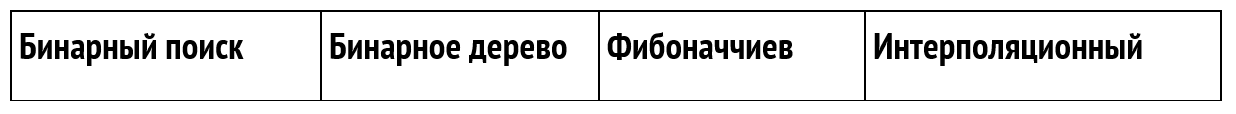

# Задание №2:
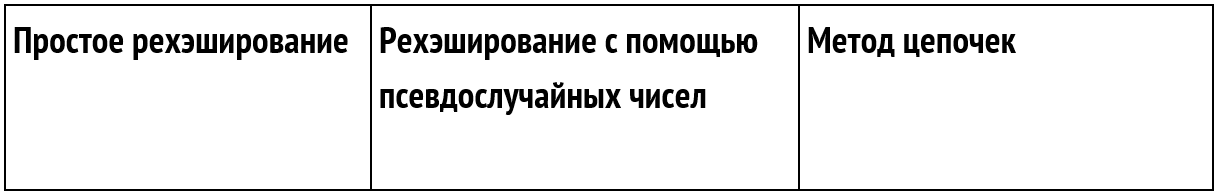

# Задание № 3:
Расставить на стандартной 64-клеточной шахматной доске 8 ферзей так, чтобы ни один из них не находился под боем другого». Подразумевается, что ферзь бьёт все клетки, расположенные по вертикалям, горизонталям и обеим диагоналям
Написать программу,  которая находит хотя бы один способ решения задач.


### Бинарный поиск

In [5]:
%%time
from random import randint

# Создание списка, его сортировка по возрастанию и вывод на экран
arr = []
for i in range(15):
    arr.append(randint(1, 50)) # append добавляет элемент в список
arr.sort()
print(arr)

# искомое число
value = int(input("Enter the number you are looking for: "))
# удаляемое число
value_delete = int(input("Enter the number you wish to delete: "))
# добавляемое число
value_add = int(input("Enter the number you wish to add: "))

def BinarySearch(lys, val):
    first = 0
    last = len(lys)-1
    index = "not found"
    while (first <= last) and (index == "not found"):
        mid = (first+last)//2
        if lys[mid] == val:
            index = mid
        else:
            if val<lys[mid]:
                last = mid -1
            else:
                first = mid + 1
    return index

def BinarySearchDelete(arr, val_d):
    arr.pop(BinarySearch(arr, val_d))

def BinarySearchAdd(arr, val_a):
    arr.append(val_a) 
    arr.sort()

print("Index =", BinarySearch(arr, value))

BinarySearchDelete(arr, value_delete)
print("A new array:", arr)

BinarySearchAdd(arr, value_add)
print("A new array:", arr)

[2, 5, 7, 7, 13, 18, 28, 29, 30, 33, 33, 36, 39, 39, 46]
Enter the number you are looking for: 7
Enter the number you wish to delete: 7
Enter the number you wish to add: 45
Index = 3
A new array: [2, 5, 7, 13, 18, 28, 29, 30, 33, 33, 36, 39, 39, 46]
A new array: [2, 5, 7, 13, 18, 28, 29, 30, 33, 33, 36, 39, 39, 45, 46]
Wall time: 13.2 s


### Бинарное дерево

In [2]:
%%time
from random import randint

# Создание списка и вывод на экран
arr = []
for i in range(15):
    arr.append(randint(1, 50)) # append добавляет элемент в список
print(arr)

# искомое число
value = int(input("Enter the number you are looking for: "))
# удаляемое число
value_delete = int(input("Enter the number you wish to delete: "))
# добавляемое число
value_add = int(input("Enter the number you wish to add: "))

D, L, R, I = 'data', 'left', 'right', 'index'
p = 0

def BinaryTree(tree, data, i):
    if tree is None:
        tree = {D: data, L: None, R: None, I: i}
    elif data <= tree[D]:
        tree[L] = BinaryTree(tree[L], data, i)
    else:
        tree[R] = BinaryTree(tree[R], data, i)
    return tree

tree = None
for i, el in enumerate(arr):
    tree = BinaryTree(tree, el, i)
    
def BinaryTreeSearch(tree):
    if value < tree[D] and tree[L] != None:
        BinaryTreeSearch(tree[L])
    elif value > tree[D] and tree[R] != None:
        BinaryTreeSearch(tree[R])
    elif value == tree[D]:
        print(tree[I])
    else:
        print("not found")
        
def BinaryTreeDelete(tree, arr, value):
    arr.pop(value) 
    tree = None
    for i, el in enumerate(arr):
        tree = BinaryTree(tree, el, i)
    
def BinaryTreeAdd(tree, arr, val_a):
    arr.append(val_a) 
    BinaryTree(tree, val_a, len(arr))
    

print("Index =", BinaryTreeSearch(tree))

BinaryTreeDelete(tree, arr, value_add)
print("A new array:", arr)

BinaryTreeAdd(tree, arr, value_add)
print("A new array:", arr)


[15, 17, 7, 9, 22, 50, 6, 10, 40, 20, 11, 47, 35, 48, 32]
Enter the number you are looking for: 9
Enter the number you wish to delete: 22
Enter the number you wish to add: 6
3
Index = None
A new array: [15, 17, 7, 9, 22, 50, 10, 40, 20, 11, 47, 35, 48, 32]
A new array: [15, 17, 7, 9, 22, 50, 10, 40, 20, 11, 47, 35, 48, 32, 6]
Wall time: 6.86 s


### Поиск Фибоначчи

In [27]:
%%time
from random import randint

# Создание списка, его сортировка по возрастанию и вывод на экран
arr = []
for i in range(15):
    arr.append(randint(1, 50)) # append добавляет элемент в список
arr.sort()
print(arr)

# искомое число
value = int(input("Enter the number you are looking for: "))
# удаляемое число
value_delete = int(input("Enter the number you wish to delete: "))
# добавляемое число
value_add = int(input("Enter the number you wish to add: "))
    
def FibonacciSearch(lys, val):
    fibM_minus_2 = 0
    fibM_minus_1 = 1
    fibM = fibM_minus_1 + fibM_minus_2
    while (fibM < val):
        fibM_minus_2 = fibM_minus_1
        fibM_minus_1 = fibM
        fibM = fibM_minus_1 + fibM_minus_2
    index = -1;
    while (fibM > 1):
        i = min(index + fibM_minus_2, (len(lys)-1))
        if (lys[i] < val):
            fibM = fibM_minus_1
            fibM_minus_1 = fibM_minus_2
            fibM_minus_2 = fibM - fibM_minus_1
            index = i
        elif (lys[i] > val):
            fibM = fibM_minus_2
            fibM_minus_1 = fibM_minus_1 - fibM_minus_2
            fibM_minus_2 = fibM - fibM_minus_1
        else :
            return i
    if(fibM_minus_1 and index < (len(lys)-1) and lys[index+1] == val):
        return index + 1;
    return "not found"

def FibonacciAdd(arr, val_a):
    arr.append(val_a) 
    arr.sort()
    
def FibonacciDelete(arr, val_d):
    arr.pop(BinarySearch(arr, val_d))
    
print("Index =", FibonacciSearch(arr, value))

FibonacciAdd(arr, value_add)
print("A new array:", arr)

FibonacciDelete(arr, value_delete)
print("A new array:", arr)

[3, 9, 14, 17, 19, 20, 23, 26, 27, 31, 32, 33, 33, 38, 49]
Enter the number you are looking for: 12
Enter the number you wish to delete: 12
Enter the number you wish to add: 12
Index = not found
Wall time: 3.3 s


### Интерполяционный поиск

In [3]:
%%time
from random import randint

# Создание списка, его сортировка по возрастанию и вывод на экран
arr = []
for i in range(15):
    arr.append(randint(1, 50)) # append добавляет элемент в список
arr.sort()
print(arr)

# искомое число
value = int(input("Enter the number you are looking for: "))
# удаляемое число
value_delete = int(input("Enter the number you wish to delete: "))
# добавляемое число
value_add = int(input("Enter the number you wish to add: "))

def InterpolationSearch(lys, val):
    low = 0
    high = (len(lys) - 1)
    while low <= high and val >= lys[low] and val <= lys[high]:
        index = low + int(((float(high - low) / ( lys[high] - lys[low])) * ( val - lys[low])))
        if lys[index] == val:
            return index
        if lys[index] < val:
            low = index + 1;
        else:
            high = index - 1;
    return "not found"

print("Index =", InterpolationSearch(arr, value))

def InterpolationAdd(arr, val_a):
    arr.append(val_a) 
    arr.sort()
    
def InterpolationDelete(arr, val_d):
    arr.pop(InterpolationSearch(arr, val_d))
    
print("Index =", InterpolationSearch(arr, value))

InterpolationAdd(arr, value_add)
print("A new array:", arr)

InterpolationDelete(arr, value_delete)
print("A new array:", arr)

[5, 7, 8, 11, 12, 19, 20, 20, 27, 29, 30, 39, 46, 47, 49]
Enter the number you are looking for: 7
Enter the number you wish to delete: 49
Enter the number you wish to add: 2
Index = 1
Index = 1
A new array: [2, 5, 7, 8, 11, 12, 19, 20, 20, 27, 29, 30, 39, 46, 47, 49]
A new array: [2, 5, 7, 8, 11, 12, 19, 20, 20, 27, 29, 30, 39, 46, 47]
Wall time: 16.4 s


### Задание №2

### Простое рехэширование


In [4]:
%%time
#Простое рехэширование
class prost_rehash:
    # Конструктор, создание словаря
    def __init__(self):
        self.rhash=[None]*256
        
    def keys(self, element): # Формирование ключа
        key=0
        for i in range(len(element)):
            key=key+ord(element[i])
        return int(key%256)
    
    def add(self, element): # Добавление элемента 
        key=self.keys(element)
        while self.rhash[key] is not None:
            key=key+1
        self.rhash[key]=element
                   
    def search(self, element): # Поиск элемента
        key=self.keys(element)
        while self.rhash[key] is not None:
            if self.rhash[key]==element:
                return key
            else:
                key=key+1
        return None
    
    def deleted(self, element): # Удаление элемента
        key=self.search(element)
        while key is not None and self.rhash[key] is not None:
            if self.rhash[key]==element:
                del self.rhash[key]
                key=int(key+1)
                while key<len(self.rhash) and self.rhash[key] is not None:
                    el=self.rhash.pop(key)
                    self.add(el)
                    key=key+1
                return 1
            else:
                key=key+1
        return -1
    
    def pr(self): #вывод на экран
        for  key, i in enumerate(self.rhash):
            if self.rhash[key] is not None:
                print(key, " ", i)
                
a=prost_rehash()
a.add("qwe")
a.add("qwq")
a.add("qws")
a.add("qwm")
a.add("qwo")
a.pr()
s=a.deleted("qwq")
print(s)
a.pr()

77   qwe
85   qwm
87   qwo
89   qwq
91   qws
1
77   qwe
85   qwm
87   qwo
91   qws
Wall time: 2 ms


### Рехэширование с помощью псевдослучайных чисел

In [5]:
%%time
import random

class random_rehash():
    # Конструктор, создание словаря
    def __init__(self):
        self.rhash=[None]*256
    
    def rand(self, element): # Формирование ключа
        key=int(0)
        for i in range(len(element)):
            key=key+ord(element[i])
        return key
    
    def keys(self, key, l): #генерация псевдослучайного числа
        random.seed(l)
        return int(key+((random.random()*10000000000000000)%1000))
            
    def add(self, element): # Добавление элемента 
        l=int(0) 
        key=self.rand(element)
        key1=self.keys(key, l)%256
        while key1<len(self.rhash) and self.rhash[key1] is not None:
            l=l+1 # от коллизий
            key1= self.keys(key, l)%256
        if key1<len(self.rhash):
            self.rhash[key1]=element
        else:
            print("Таблица заполнена")
                   
    def search(self, element): # Поиск элемента
        l=int(0)
        key=self.rand(element)
        key1=self.keys(key, l)%256
        while key1<len(self.rhash) and self.rhash[key1] is not None:
            if self.rhash[key1]==element:
                return key1
            else:
                l=l+1
                key1=self.keys(key, l)
        return None
    
    def deleted(self, element): # Удаление элемента
        l=int(0)
        keyn=self.rand(element)
        key1=self.keys(keyn, l)%256
        key=self.search(element)
        if key is not None:
            while key is not key1:
                l=l+1
                key1=self.keys(keyn, l)%256
                self.rhash[key]=None
                l=l+1
                key1=self.keys(keyn, l)%256
            while key1<len(self.rhash) and self.rhash[key1] is not None:
                el=self.rhash[key1]
                self.rhash[key1]=None
                self.add(el)
                l=l+1
                key1=self.keys(keyn, l)%256
            return "Элемент удален"
        else:
            return "Элемент не найден"
                 
    def pr(self): #
        for key, i in enumerate(self.rhash):
            if self.rhash[key] is not None:
                print(key, " ", i)
                
a=random_rehash()
a.add("qwe")
a.add("qwe")
a.add("qwe")
a.add("qwe")
a.add("qwe")
a.pr()
s=a.deleted("qwe")
print(s)
a.pr()
print(a.search("qwe"))


46   qwe
59   qwe
89   qwe
166   qwe
222   qwe
Элемент удален
46   qwe
59   qwe
89   qwe
166   qwe
222   qwe
46
Wall time: 3 ms


### Метод цепочки

In [6]:
%%time
class chain_rehash:
    # Конструктор, создание словаря
    def __init__(self):
        self.rhash=[[]*0 for i in range(10)]
    
    def add(self, element):  # Добавление элемента
        key=int(0)
        for i in range(len(element)):
            key=key+ord(element[i])
        key=key%10
        self.rhash[key].append(element)
        
    def search(self, element): #Поиск
            key=int(0)
            for i in range(len(element)):
                key=key+ord(element[i])
            key=key%10
            if self.rhash[key] is not None:
                for i in range(len(self.rhash[key])):
                    if self.rhash[key][i]==element:
                        return key, i
            return None, None
            
    def deleted(self, element):
            key, i=self.search(element)
            if key is not None:
                del(self.rhash[key][i])
                print("Элемент успешно удален")
            else:
                print("Элемент не найден")
                return -1
    
    def pr(self): #вывод
        for key in range(len(self.rhash)):
            for i in range(len(self.rhash[key])):
                if self.rhash[key][i] is not None:
                    print("(ключ)", key, "- (Элемент)", self.rhash[key][i])


a=chain_rehash()
a.add("qwe")
a.add("qwe")
a.add("qwe")
a.pr()
a.deleted("qwe")
a.pr()

(ключ) 3 - (Элемент) qwe
(ключ) 3 - (Элемент) qwe
(ключ) 3 - (Элемент) qwe
Элемент успешно удален
(ключ) 3 - (Элемент) qwe
(ключ) 3 - (Элемент) qwe
Wall time: 2 ms


### Задани №3

In [7]:
# Queens - массив, в котором индекс это строка, значение это столбец, где стоит ферзь
def findQueens(Queens=[0]*8, i=0):
    # Если на доске уже 8 ферзей, то рекурсия останавливается
    if i ==8:
        arr = [[0 for i in range(8)] for j in range(8)]
        for i in range(8):
            for j in range(8):
                arr[i][Queens[i]] = 1
        print(Queens)
        return arr
    else:
        for j in range(8):
            # Проверяем свободно ли поле
            if checkField(i,j,Queens):
                # Если да, записываем координату ферзя 
                Queens[i]=j
                # Снова вызываем функцию со следующей строки
                chessBoard = findQueens(Queens,i+1)
                # если переменная не пустая, выходим в предыдующую функцию с этой перемееной
                if chessBoard:
                    return chessBoard
                
#Проверяет поле на атаку другими ферзями
def checkField(i,j,Queens):
    r=i
    c=j
    #В столбце
    for k in range(i):
        if j == Queens[k]:
            return False
    # В ниспадающей диагонали    
    while i>=0 and j>=0:
        if Queens[i]==j:
            return False
        i-=1
        j-=1
    # В растущей диагонали    
    while r>=0 and c<=7:
        if Queens[r]==c:
            return False
        r-=1
        c+=1    
    return True

findQueens()

[1, 6, 4, 7, 0, 3, 5, 2]


[[0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0]]

## Вывод
### В этой лабораторной работе была изучена реализация методов поиска, а также задание "8 ферзей"